<a href="https://colab.research.google.com/github/nassim-fox/countries_population_web-scraping/blob/master/countries_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as p
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re


In [0]:
from IPython.display import clear_output

def prgrs(i,l):
    clear_output()
    print(" {} % ".format(int(i*(100/l))))

In [0]:

def getContent(url) : 
    html = urlopen(url)
    soup = BeautifulSoup(html,'html.parser')
    return soup

In [0]:

content = getContent("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")
t = content.find_all('table')


In [0]:
wiki_en_url = 'https://en.wikipedia.org'


In [0]:
countries_url = []
countries = []
population = []
world_pop = []

table = content.find('table',{'class':'wikitable sortable'})
rows = table.find_all('tr')
for row in rows : 
    cells = row.find_all('td') 
    if len(cells) > 1 : 
        country_link = cells[1].find('a')
        print(wiki_en_url+country_link.get('href'))
        countryhref = ""
        if "File:" in country_link.get('href') : 
          countryhref = cells[1].findNext('a').findNext('a').get('href')
        else : 
          countryhref = country_link.get('href')
          
        countries_url.append(wiki_en_url+countryhref)
        countries.append(countryhref.replace('/wiki/',''))
        population.append(cells[2].contents[0])
        world_pop.append(cells[4].contents[0])
        

https://en.wikipedia.org/wiki/China
https://en.wikipedia.org/wiki/India
https://en.wikipedia.org/wiki/United_States
https://en.wikipedia.org/wiki/Indonesia
https://en.wikipedia.org/wiki/Brazil
https://en.wikipedia.org/wiki/Pakistan
https://en.wikipedia.org/wiki/Nigeria
https://en.wikipedia.org/wiki/Bangladesh
https://en.wikipedia.org/wiki/Russia
https://en.wikipedia.org/wiki/Mexico
https://en.wikipedia.org/wiki/Japan
https://en.wikipedia.org/wiki/Philippines
https://en.wikipedia.org/wiki/Egypt
https://en.wikipedia.org/wiki/Ethiopia
https://en.wikipedia.org/wiki/Vietnam
https://en.wikipedia.org/wiki/Democratic_Republic_of_the_Congo
https://en.wikipedia.org/wiki/Germany
https://en.wikipedia.org/wiki/Iran
https://en.wikipedia.org/wiki/Turkey
https://en.wikipedia.org/wiki/France
https://en.wikipedia.org/wiki/Thailand
https://en.wikipedia.org/wiki/United_Kingdom
https://en.wikipedia.org/wiki/Italy
https://en.wikipedia.org/wiki/South_Africa
https://en.wikipedia.org/wiki/Tanzania
https://en.w

In [0]:

areas = []
i = 0 
l = len(countries_url)

for country_url in countries_url : 
    country_content = getContent(country_url)
    table = country_content.find('table',{'class':'infobox geography vcard'})
    if table != None : 
      ths = table.find_all('th')
      for th in ths : 
        if ( th.find('a')!=None and th.find('a').contents[0] == 'Area ') or ( th.contents[0] == 'Area') : 
                  row = th.findNext('tr')
                  if row != None : 
                    area = re.findall(r'\d+(?:[,|.]\d+)*',row.find('td').get_text())
                    if len(area) > 0 :  
                      areas.append(area[0]) 
                    else : 
                      areas.append(np.nan)
                    #print(re.findall(r'\d+(?:,\d+)*',row.find('td').get_text())[0])
                    prgrs(i,l)
                    i = i + 1 
                    break 
         


 99 % 


In [0]:
areas

['9,596,961',
 '3,287,263',
 '3,796,742',
 '1,904,569',
 '8,515,767',
 '881,913',
 '923,768',
 '147,570',
 '17,125,191',
 '1,972,550',
 '377,973',
 '300,000',
 '1,010,408',
 '1,104,300',
 '331,212',
 '2,345,409',
 '357,386',
 '1,648,195',
 '783,356',
 '640,679',
 '513,120',
 '242,495',
 '301,340',
 '1,221,037',
 '947,303',
 '676,578',
 '580,367',
 '100,363',
 '505,990',
 '1,141,748',
 '2,780,400',
 '2,381,741',
 '603,628',
 '1,886,068',
 '241,038',
 '437,072',
 '312,696',
 '9,984,670',
 '710,850',
 '448,978',
 '2,149,690',
 '330,803',
 '1,285,216',
 '916,445',
 '652,230',
 '239,567',
 '1,246,700',
 '147,181',
 '527,968',
 '801,590',
 '322,463',
 '120,540',
 '7,692,024',
 '587,041',
 '475,442',
 '35,980',
 '1,267,000',
 '65,610',
 '274,200',
 '1,240,192',
 '238,397',
 '756,096.3',
 '185,180',
 '2,724,900',
 '108,889',
 '118,484',
 '752,618',
 '41,543',
 '283,561',
 '181,035',
 '196,712',
 '1,284,000',
 '637,657',
 '390,757',
 '619,745',
 '26,338',
 '245,836',
 '114,763',
 '27,750',
 '16

In [0]:
df = pd.DataFrame([countries,areas,population,world_pop]).T
df.columns = ['country','area','population','% of world population']
df.index += 1 
df

,country,area,population,% of world population
1,China,"9,596,961","1,397,380,000",18.1%
2,India,"3,287,263","1,347,340,000",17.5%
3,United_States,"3,796,742","329,221,000",4.27%
4,Indonesia,"1,904,569","268,074,600",3.48%
5,Brazil,"8,515,767","209,920,000",2.72%
6,Pakistan,"881,913","204,699,000",2.66%
7,Nigeria,"923,768","200,962,417",2.61%
8,Bangladesh,"147,570","166,572,000",2.16%
9,Russia,"17,125,191","146,793,744",1.9%
10,Mexico,"1,972,550","126,577,691",1.64%


In [0]:
df.to_csv('countries_population1.csv',index=False)

In [0]:
df.isna().sum()

country                  0
area                     1
population               0
% of world population    0
dtype: int64

In [0]:
df['area'] = df['area'].apply(lambda x : 0 if  x == np.nan   else x  )
df['area'] = df['area'].apply(lambda x : float(x.replace(',','').replace(' ','')) if isinstance(x,str)   else x  )
df['population'] = df['population'].apply(lambda x : int(x.replace(',','').replace(' ','')) if isinstance(x,str)   else int(x)  )
df['% of world population'] = df['% of world population'].apply(lambda x : float(x.replace('%','')) if isinstance(x,str) else x )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 1 to 240
Data columns (total 4 columns):
country                  240 non-null object
area                     239 non-null float64
population               240 non-null int64
% of world population    240 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.6+ KB


In [0]:
df.to_csv('countries_population2.csv',index=False)

In [0]:
df = pd.read_csv('countries_population2.csv')

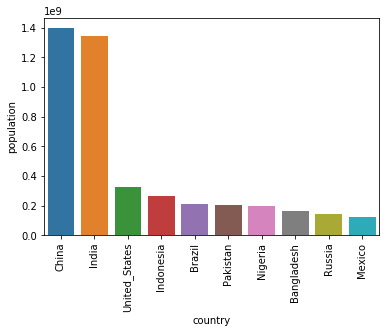

In [210]:
p.xticks(rotation=90)
sns.barplot(df.iloc[:10]['country'],df.iloc[:10]['population'])